In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
#Read in data
df = pd.read_csv("twitter-sentiment140-350k.csv")
df.head(5)

,post
0,Had a good first days WE at the herald
1,whaat. making sure.. she's safe.
2,"HAHAHAHAHAHA, Se ferrou!"
3,Cant sleep with bad thoughts in my mind
4,"so tired and sick of trains, tho getting on an..."


In [4]:
# Some extra cleaning. Replacing html ampersand codes.
from w3lib.html import replace_entities
df["post"] = df["post"].astype(str)
df["post"] = df["post"].apply(replace_entities)

# Positive/Negative Word Counts
Positive and negative word lists pulled from https://ptrckprry.com/course/ssd/data/positive-words.txt
and https://ptrckprry.com/course/ssd/data/negative-words.txt
respectively.

First we read in the word lists and set up functions that will count their occurences.

In [6]:
with open("wordLists/positive_words.txt",'r') as file:
    positive_words = file.read().splitlines()

with open("wordLists/negative_words.txt",'r') as file:
    negative_words = file.read().splitlines()

In [7]:
print(len(positive_words))
print(len(negative_words))

2006
4783


In [8]:
#Functions that count the occurences of positive/negative words in a text string
def count_positive(text):
    counter = 0
    for word in positive_words:
        counter += text.lower().split().count(word)
    return counter
def count_negative(text):
    counter = 0
    for word in negative_words:
        counter += text.lower().split().count(word)
    return counter

We create the new features (this takes a minute to run)

In [9]:
df["positive_words"] = df["post"].apply(count_positive)

In [10]:
df["negative_words"] = df["post"].apply(count_negative)

Look at some stats

In [11]:
df.positive_words.describe()

count    349388.000000
mean          0.505364
std           0.744097
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: positive_words, dtype: float64

In [12]:
df.negative_words.describe()

count    349388.000000
mean          0.356895
std           0.634013
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: negative_words, dtype: float64

What are the most positive and negative tweets?

In [13]:
most_positive = df["positive_words"].argmax()

In [15]:
print(df.iloc[most_positive].post)
print(df.iloc[most_positive].positive_words)

  It cut off my thank you! - thank you thank you thank you thank you thank you thank you thank you thank you thank you thank you!
11


In [16]:
most_negative = df["negative_words"].argmax()

In [17]:
print(df.iloc[most_negative].post)
print(df.iloc[most_negative].negative_words)

I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS I HATE EXAMS AHHHHHH 
10


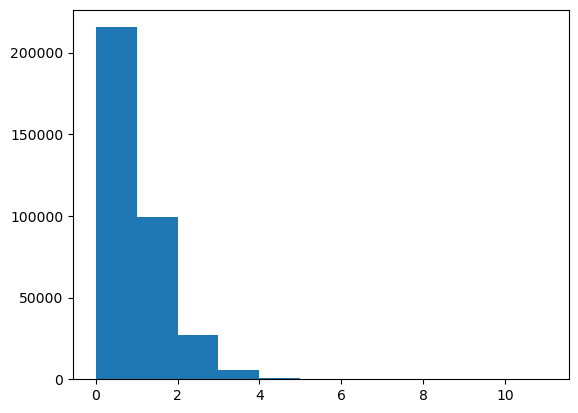

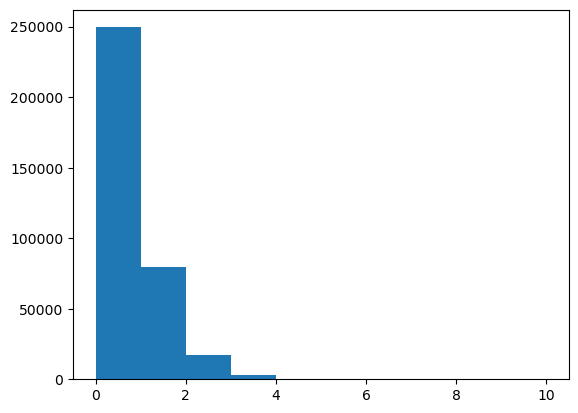

In [18]:
plt.hist(df.positive_words, bins = df.positive_words.max())
plt.show()
plt.hist(df.negative_words, bins = df.negative_words.max())
plt.show()

# Text Length

In [19]:
df["length"] = df["post"].apply(len)
df["word_count"] = df["post"].apply((lambda s:len(s.split())))

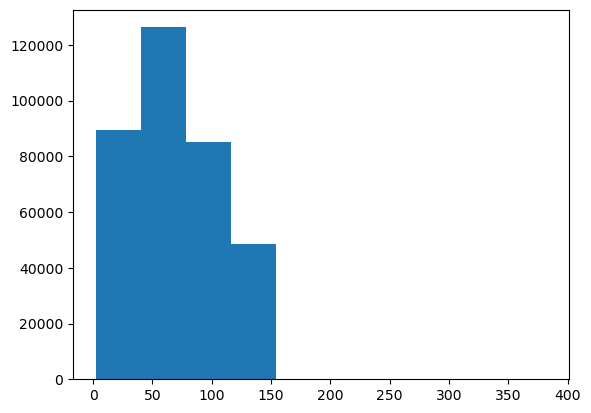

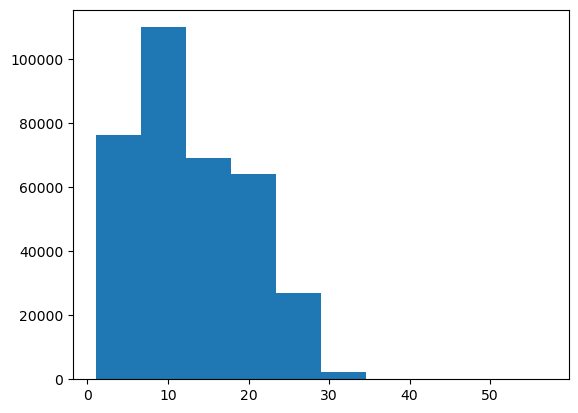

In [20]:
plt.hist(df["length"])
plt.show()
plt.hist(df["word_count"])
plt.show()

# Male and Female words
Word lists adapted from https://github.com/DanielleSucher/Jailbreak-the-Patriarchy/blob/master/myscript.js

In [21]:
with open("wordLists/male_words", 'r') as file:
    male_words = file.read().splitlines()

In [22]:
with open("wordLists/female_words", 'r') as file:
    female_words = file.read().splitlines()

In [23]:
def count_male(text):
    counter = 0
    for word in male_words:
        counter += text.lower().split().count(word)
    return counter
def count_female(text):
    counter = 0
    for word in female_words:
        counter += text.lower().split().count(word)
    return counter

In [24]:
df["male_words"] = df["post"].apply(count_male)

In [25]:
df["female_words"] = df["post"].apply(count_female)

In [26]:
df["male_words"].describe()

count    349388.000000
mean          0.089239
std           0.442333
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: male_words, dtype: float64

In [27]:
df["female_words"].describe()

count    349388.000000
mean          0.078291
std           0.444804
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: female_words, dtype: float64

What are the most male and female tweets in the dataset?

In [28]:
df.iloc[df["female_words"].argmax()].post

'Thinking about my mom today The kind of mom she wanted to be, the kind of mom she had to be the kind of mom she ended up being '

In [29]:
df.iloc[df["male_words"].argmax()].post

"my brother insists i not change the channel on the tv, as he says he is 'watching it', but he was bloody asleep. he is just like my dad "

# Sentiment analysis scores from Afinn

In [30]:
from afinn import Afinn
afinn = Afinn(language='en')
df["afinn"] = df["post"].apply(afinn.score)

In [31]:
df.sample(10)

,post,positive_words,negative_words,length,word_count,male_words,female_words,afinn
261973,"today, i worshipped a tree, ate couscous, and...",0,0,95,14,0,0,0.0
252676,Mental arithmatic in a bit at least it's last...,0,0,54,10,0,0,0.0
37345,my only problem with it is when Jacob turns i...,1,2,113,21,0,0,-3.0
881,Got TweetDeck because my Twitterific stopped w...,0,1,58,8,0,0,-3.0
303016,Now dat I have my headline onto finishin the e...,0,0,108,19,0,0,0.0
153155,Hot n sweaty on turnpike lane http://twitpic....,1,1,55,7,0,0,0.0
278995,thanks. it was a tough Saturday. I still have...,1,0,102,21,0,0,7.0
320980,sounds like a plan to me! hehe. thanks for y...,2,0,75,13,0,0,11.0
139239,Tight game @ halftime. 63-62. Not in rat city'...,0,0,55,10,0,0,2.0
176647,So sad right now. My puppy just died.,1,1,38,8,0,0,-5.0


# Save the resulting Dataframe!

In [32]:
df.to_csv("twitter_sent140_with_features.csv")

In [33]:
dfsmall = df.head(270000)

In [34]:
dfsmall

,post,positive_words,negative_words,length,word_count,male_words,female_words,afinn
0,Had a good first days WE at the herald,1,0,39,9,0,0,3.0
1,whaat. making sure.. she's safe.,0,0,34,5,0,0,1.0
2,"HAHAHAHAHAHA, Se ferrou!",0,0,26,3,0,0,0.0
3,Cant sleep with bad thoughts in my mind,0,1,40,8,0,0,-3.0
4,"so tired and sick of trains, tho getting on an...",0,2,57,11,0,0,-4.0
...,...,...,...,...,...,...,...,...
269995,"Apart from that, was a great night and I'm rea...",1,1,129,26,1,0,1.0
269996,i want all the how i met your mothers seasons ...,1,0,102,21,0,0,4.0
269997,wish I hadn't missed it!!,0,1,28,5,0,0,-1.0
269998,Good morning all you lovely tweeters. What a ...,3,0,63,11,0,0,9.0


In [35]:
dfsmall.to_csv("twitter_sent140_with_features_270k_row.csv")